#  1 . 그래프 탐색(순회)
### 본 실습에서는 그래프 의 각 노드를 순회하는 알고리즘을 살펴 봅시다. 그래프 순회는 깊이우선(Depth First) 와 너비우선(Width First) 알고리즘들이 있습니다.
![alt text](fig12-DFS_BFS.JPG)
![alt text](fig12-DFS_WFS.JPG)

####  10주 실습에서 살펴보았던 다음 [그림1 ] 의 그래프에 대해 깊이우선탐색, 너비우선탐색에 대해 살펴보기로 합니다. 
![alt text](fig12-1.png)

#### 상기  [그림1]의  그래프에 대해, 그래프 표현은 이미 학습한대로  adjacency list 를 사용하며, 파이썬에서는 이를 dictionary 로 다음과 같이 표현합니다.

In [2]:
graph1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N'],}
graph1

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'S': ['B', 'L', 'N']}

<br/>

## 1.1. 깊이우선탐색 (Depth First Search)

#### 깊이우선탐색 알고리즘은 시작노드에서 시작하여 시작 노드를 탐색된 것으로 등록하고, 또다시 시작노드의 인접노드 들에 대해 순차적으로 살펴보면서 탐색된 것이 아니면 탐색된 것으로 등록하고, 다시 이 노드의 인접 노드들에 대해 같은 과정을 되풀이해 가면서 탐색하는 것으로 재귀적 알고리즘으로 구현하면 편리합니다.  
#### 재귀적으로 구현하지 않고 반복적으로 구현하는 경우에,  탐색된 노드의  인접 노드들을 살펴보고 이미 탐색된 것이 아닌 인접노드들은 역순으로 다음 단계 탐색을 위해 스택에 저장합니다.  이후,  현 단계의 탐색이 모두 마쳐지면, 스택에서 하나씩 꺼내어 꺼내진 노드를 탐색된 것으로 등록하고,  이 노드의 인접 노드들을 살펴보고 이미 탐색된 것이 아닌 인접노드들은 역순으로  다음 단계 탐색을 위해 스택에 저장합니다. 이후, 스택에서 제일 마지막에 삽입된 것을 꺼내어서 탐색해 나갑니다.  

### 그래프의 재귀적 깊이우선탐색에 대한  의사코드(pseudo-code)는 아래와 같습니다. 

~~~python
DFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    for every edge (s, v):
       if v unexplored:
          DFS(G, v)
~~~

### 다음은 재귀적 깊이우선탐색에 의한, 주어진 시작노드에서 시작하여 모든 노드를 순회하는 그래프 모든 노드의 탐색(순회) 파이썬 알고리즘 구현입니다. 

In [3]:
def dfs(graph, start,explored=[]):  #graph ; 인접 노드 목록 그래프 표현, #start ;  시작 노드, explored=탐색된 노드 리스트
    if not start in graph: #시작노드가 그래프 노드 가 아니면 문제 있음 
        return None
   
    if start in explored: # (1) 만일 시작 노드가 이미 탐색된 것이면, explored 리턴 ; 재귀 종료 조건
        return explored

    explored = explored + [start] # (2) 시작 노드를 탐색된 노드 리스트에 추가 
    for w in graph[start]: # (3) 시작노드들의 인접 노드들에 대해 for looping   
        if w not in explored:  # (4) 인접 노드가 탐색 노드 리스트에 없는 지를 점검
            explored=dfs(graph, w, explored)  # (5)계속해서 깊이 탐색해 들어감    
    return explored

#### [그림 1]  의 그래프에 대해 상기 재귀적 깊이우선탐색 알고리즘을  적용해봅시다. 
![Alttext](fig12-2.png)

In [4]:
dfs(graph1, 'S')

['S', 'B', 'F', 'E', 'L', 'N']

#### [그림 2 (c)] 의 깊이 우선 탐색 그래프 순회 알고리즘 ([그림 2(a)] )의 그래프 노드 순회 순서가 맞는 지를 확인하여 봅시다.

In [5]:
def dfs_check(graph, start, explored=[]):  #graph ; 인접 노드 목록 그래프 표현, #start ;  시작 노드, explored=탐색된 노드 리스트
    global traversal
    if not start in graph: #시작노드가 그래프 노드 가 아니면 문제 있음 
        return None
    
    if start in explored: # (1) 만일 시작 노드가 이미 탐색된 것이면, explored 리턴
        return explored
    
    explored = explored + [start] # (2) 시작 노드를 탐색된 노드 리스트에 추가 
    for w in graph[start]: # (3) 시작노드들의 인접 노드들에 대해 for looping
        traversal.append(w)
        if w not in explored:  # (4) 인접 노드가 탐색 노드 리스트에 없는 지를 점검
            explored=dfs_check(graph, w, explored)  # (5)계속해서 깊이 탐색해 들어감    
    return explored

In [6]:
traversal=['S']
explored=dfs_check(graph1, 'S')
print("\n explored nodes=", explored)
print("\n Traversal nodes =",traversal)
print("\n The number of traversal nodes =", len(traversal))


 explored nodes= ['S', 'B', 'F', 'E', 'L', 'N']

 Traversal nodes = ['S', 'B', 'F', 'B', 'E', 'F', 'L', 'B', 'E', 'F', 'N', 'B', 'F', 'L', 'S', 'S', 'L', 'N', 'L', 'N', 'S', 'L', 'N']

 The number of traversal nodes = 23


#### 상기 [그림 2] 의 그래프에서 노드 $'L'$  에서 노드 $'N'$ 까지 에지가 없는 [그림 2-1 (b)] 그래프 노드들의 깊이 탐색 순회의 경우를 검토해 봅시다.  
![Alttext](fig12-2_1.png)
#### 이 때, [그림 2-1] 의 가운데 있는 그래프 ([그림 2-1(b)] 에서 노드 'S' , 노드 'B' ,노드 'F' , 노드 'E' , 노드 'L' 순으로 계속 깊이 들어가서 탐색했다가, 상위 레벨로 올라가 노드 'F 의 나머지 다른 인접노드  'L' 은 이미 탐색하였고 마지막으로 노드 'F 의  마지막 인접노드  'N' 을 탐색하게  됩니다.  이렇게 거슬러 올라가서 탐색하는 것을  "Back Tracking" 이라 합니다.¶

In [7]:
graph2_1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'S'],
       'N': ['B', 'F', 'S'],
       'S': ['B', 'L', 'N'],}
graph2_1

{'B': ['F', 'L', 'N', 'S'],
 'E': ['F', 'L'],
 'F': ['B', 'E', 'L', 'N'],
 'L': ['B', 'E', 'F', 'S'],
 'N': ['B', 'F', 'S'],
 'S': ['B', 'L', 'N']}

In [8]:
traversal=['S']
explored=dfs_check(graph2_1, 'S')
print("\n explored nodes=", explored)
print("\n Traversal nodes =",traversal)
print("\n The number of traversal nodes =", len(traversal))


 explored nodes= ['S', 'B', 'F', 'E', 'L', 'N']

 Traversal nodes = ['S', 'B', 'F', 'B', 'E', 'F', 'L', 'B', 'E', 'F', 'S', 'L', 'N', 'B', 'F', 'S', 'L', 'N', 'S', 'L', 'N']

 The number of traversal nodes = 21


### networkX 패키기를 활용한 깊이 우선 탐색 

In [9]:
import networkx as nx # networkx 패키지 임포트
G1=nx.Graph()
Nodes=['B', 'E', 'F', 'L', 'N',  'S' ]
G1.add_nodes_from(Nodes)

# adding a list of edges:
G1.add_edges_from([('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('L', 'S' ), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('L', 'N'), ('N', 'F'), ('N', 'S')])                   
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges(data=True))

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F', {}), ('B', 'L', {}), ('B', 'N', {}), ('B', 'S', {}), ('E', 'F', {}), ('E', 'L', {}), ('F', 'L', {}), ('F', 'N', {}), ('L', 'S', {}), ('L', 'N', {}), ('N', 'S', {})]


In [10]:
list(nx.dfs_edges(G1, 'S'))

[('S', 'B'), ('B', 'F'), ('F', 'E'), ('E', 'L'), ('L', 'N')]

In [68]:
list(nx.bfs_edges(G1, 'S'))

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

### 깊이우선탐색에 의한, 시작노드에서 종단 노드로의 단순 경로  찾기
#### 단순 경로는 회로가 포함하지 않는 경로를 말합니다.
#### 깊이우선탐색에 의한 단순 경로 찾기는 시작 노드에서 시작한 깊이 탐색 결과 과정중에 탐색된 노드가 종단 노드이면 종결됩니다. 

#### 다음은 재귀적 깊이우선탐색을 이용한 주어진 시작 노드에서 종단노드까지의 단순 경로 하나 찾기 알고리즘 파이썬 구현입니다.

In [12]:
def find_path_by_dfs(graph, start, end, path=[]):   
      #  print("path=: {}".format(path))
        if not start in graph:
            return None
        
        path = path + [start]
        
        if start == end : #시작노드로부터 종단노드까지의 경로인지를 점검
        #    print("path=: {}".format(path))
            return path
  
        for node in graph[start]:            
                if node not in path:                
                    newpath = find_path_by_dfs(graph, node, end, path)
                    if newpath: return newpath #시작 노드로 부터 종단노드까지의 경로를 발견했으면 알고리즘 수행을 종료하고 찾은 경로 복귀
        return None         

#### [그림 1]  의 그래프에 대해 깊이우선탐색 기반으로 경로 하나를 탐색해 봅시다.

In [13]:
find_path_by_dfs(graph1, 'S', 'F')

['S', 'B', 'F']

### 깊이우선탐색에 의한,  그래프 지정 노드에서의 단순 회로 하나  찾기
#### 단순 회로는 내부에 회로를 포함하지 않는 회로를 말합니다. 
#### 깊이우선탐색에 의한 단순 회로 찾기는 시작 노드에서 시작한 깊이 우선 탐색 결과 과정중에 탐색된 노드가 지정노드이면 종결됩니다.  

In [14]:
def find_circuit_by_dfs(graph, start, end, circuit=[]): # start : 시작노드로 처음에는 그래프 지정노드임, end: 그래프에서의 지정 노드
        if not start in graph : # (1) 시작노드가  그래프 노드 인지 점검
            return None
        
        circuit = circuit+ [start]
        if len(circuit) > 3 and start == end:
#        ('S', 'L', 'S' ) 같은 경우를 배제하기 위해, "len(circuit) > 3 " 사용
           return circuit

        for node in graph[start]:
            #rint("node:{}".format(node))
            if node not in circuit or (len(circuit) >2 and (node==end)):
                    newcircuit = find_circuit_by_dfs(graph, node,end, circuit)
                    if newcircuit: return newcircuit
        return None      

In [15]:
find_circuit_by_dfs(graph1, 'S', 'S')

['S', 'B', 'F', 'E', 'L', 'N', 'S']

In [16]:
find_circuit_by_dfs(graph1, 'E', 'E')

['E', 'F', 'B', 'L', 'E']

### 깊이우선탐색으로 시작 노드에서  종단 노드에로의 모든 단순 경로 찾기 
#### 다음은 깊이우선탐색을 이용한,  시작 노드에서  종단 노드에로의 모든 단순 경로 탐색 파이썬 알고리즘 구현입니다.

In [17]:
def find_all_paths_by_dfs(graph, start, end, path=[]):
    if not start in graph : # (1) 시작노드가  그래프 노드 인지 점검
            return None
    path = path + [start] # (2) ; 경로 업데이트 
    if start == end :  # (3) 시작노드 와 종단노드간 경로를 찾았는 지 점검
            return [path]  # 'find_all_paths_by_dfs'의 return  타입을 리스트의 리스트로 맞추기 위해, [path] 로 함
       
    all_paths = [] # (4) 모든 시작노드 와 종단 노드간의 모든 경로를 담는 경로(리스트 타입)의 리스트
    for node in graph[start]: # (5) 시작 노드의 인접 노드 탐색 
            if node not in path:
                newpaths = find_all_paths_by_dfs(graph, node, end, path) # (6) newpaths 는 해당 노드(node)를 시작로 한 모든 경로들의 리스트
              #  print("NewPaths=", newpaths)
                for newpath in newpaths:  # (7) all_paths에  newpaths에 있는 모든 경로를 추가 
                    all_paths.append(newpath)
            # 이때 "all_paths" 는 graph[start] 에 있는 인접노드들중 처음부터 'node' 까지의 각각을 통과하는 '시작' 노드 및 '종단' 노드 까지의 
            # 의 경로들의 모임 
            # 따라서, 'start' 가 시작노드 이며, 'for' loop 동안 시작노드에서 시작노드에서 시작하여  시작노드의 인접노드들을 종단노드에 도달하는 
            # 모든 경로가  all_paths 에 포함됨
    return all_paths

In [18]:
find_all_paths_by_dfs(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F']]

In [19]:
len(find_all_paths_by_dfs(graph1, 'S', 'F'))

20

#### networkX 패키기를 활용한 모든 단순 경로 찾기

In [20]:
list(nx.all_simple_paths(G1, 'S', 'F'))

[['S', 'B', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'N', 'F']]

In [21]:
len(list(nx.all_simple_paths(G1, 'S', 'F')))

20

### 깊이우선탐색으로 시작 노드에서  종단 노드에로의 모든 단순 회로 찾기 
#### 다음은 깊이우선탐색을 이용한,  시작 노드에서  종단 노드에로의 모든 단순 회로 탐색 파이썬 알고리즘 구현입니다.

In [22]:
def find_all_circuits_by_dfs(graph, start, end, circuit=[]):
    if not start in graph : # (1) 시작노드가  그래프 노드 인지 점검
            return None
    circuit = circuit + [start] # (2) ; 경로 업데이트 
    if len(circuit) > 3 and start == end:  # (3) 시작노드 와 종단노드간 경로를 찾았는 지 점검
#        ('S', 'L', 'S' ) 같은 경우를 배제하기 위해, "len(circuit) > 3 " 사용
           return [circuit]  # 'find_all_circuits_by_dfs'의 return  타입을 리스트의 리스트로 맞추기 위해, [circuit] 로 함
   
       
    all_circuits = [] # (4) 모든 시작노드 와 종단 노드간의 모든 경로를 담는 경로(리스트 타입)의 리스트
    for node in graph[start]: # (5) 시작 노드의 인접 노드 탐색 
            if node not in circuit or (len(circuit) >2 and (node==end)):
                newcircuits = find_all_circuits_by_dfs(graph, node, end, circuit) # (6) newpaths 는 해당 노드(node)를 시작로 한 모든 경로들의 리스트
              #  print("NewPaths=", newpaths)
                for newcircuit in newcircuits:  # (7) all_paths에  newpaths에 있는 모든 경로를 추가 
                    all_circuits.append(newcircuit)
            # 이때 "all_circuits" 는 graph[start] 에 있는 인접노드들 각각을 통과하는 '지정노드' 에서 '지정노드' 까지의 회로들의 모임 
            
    return all_circuits

In [23]:
all_circuits_by_dfs=find_all_circuits_by_dfs(graph1, 'S', 'S')
all_circuits_by_dfs

[['S', 'B', 'F', 'E', 'L', 'N', 'S'],
 ['S', 'B', 'F', 'E', 'L', 'S'],
 ['S', 'B', 'F', 'L', 'N', 'S'],
 ['S', 'B', 'F', 'L', 'S'],
 ['S', 'B', 'F', 'N', 'L', 'S'],
 ['S', 'B', 'F', 'N', 'S'],
 ['S', 'B', 'L', 'E', 'F', 'N', 'S'],
 ['S', 'B', 'L', 'F', 'N', 'S'],
 ['S', 'B', 'L', 'N', 'S'],
 ['S', 'B', 'L', 'S'],
 ['S', 'B', 'N', 'F', 'E', 'L', 'S'],
 ['S', 'B', 'N', 'F', 'L', 'S'],
 ['S', 'B', 'N', 'L', 'S'],
 ['S', 'B', 'N', 'S'],
 ['S', 'L', 'B', 'F', 'N', 'S'],
 ['S', 'L', 'B', 'N', 'S'],
 ['S', 'L', 'B', 'S'],
 ['S', 'L', 'E', 'F', 'B', 'N', 'S'],
 ['S', 'L', 'E', 'F', 'B', 'S'],
 ['S', 'L', 'E', 'F', 'N', 'B', 'S'],
 ['S', 'L', 'E', 'F', 'N', 'S'],
 ['S', 'L', 'F', 'B', 'N', 'S'],
 ['S', 'L', 'F', 'B', 'S'],
 ['S', 'L', 'F', 'N', 'B', 'S'],
 ['S', 'L', 'F', 'N', 'S'],
 ['S', 'L', 'N', 'B', 'S'],
 ['S', 'L', 'N', 'F', 'B', 'S'],
 ['S', 'L', 'N', 'S'],
 ['S', 'N', 'B', 'F', 'E', 'L', 'S'],
 ['S', 'N', 'B', 'F', 'L', 'S'],
 ['S', 'N', 'B', 'L', 'S'],
 ['S', 'N', 'B', 'S'],
 ['S', 'N

In [24]:
len(find_all_circuits_by_dfs(graph1, 'S', 'S'))

42

## 1.2. 너비우선탐색(Breadth First Search)
#### 너비우선탐색 알고리즘은 시작노드에서 시작하여 인접노드를 순서대로 탐색하면서,  이  탐색한 노드를  다음 단계 탐색을 위해 큐에 저장합니다.  현 단계의 탐색이 모두 마쳐지면, 현 단계에서 탐색된 노드들을 큐에서 하나씩 꺼내어 인접 노드들을 탐색해 나가는 것입니다. 
#### 너비우선탐색에 대한 의사코드(pseudo-code)는 아래와 같습니다.

~~~python
BFS(graph G, start vertex s):
    // all nodes initially unexplored
    mark s as explored
    let Q = queue data structure, initialized with s
    while Q is non-empty:
        remove the first node of Q, call it v
        for each edge(v, w):  // for w in graph[v]
            if w unexplored:
                mark w as explored
                add w to Q (at the end)
~~~

### 다음은 너비우선탐색에 의한 그래프 모든 노드의 탐색(순회) 파이썬 알고리즘 구현입니다. 


In [25]:
def bfs(graph, start): 
    explored, queue = list(), [start]  #  큐에는 순회될  다음 레벨의 노드들이 순차적으로 저장됨
    explored.append(start)
    while queue: #탐색할 큐에 노드가 있는 한 계속 수행  
        v = queue.pop(0)  # 큐에서  FIFO 순으로 큐의 제일앞에 있는 노드을  뽑음
        for w in graph[v]:   #현재 노드 v 의 인접 모드들에 대해 for looping        
            if w not in explored:                
                explored.append(w) #현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록   
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
    return explored

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 노드를 순회해 봅시다.
![Alttext](fig12-3.jpg)
#### 여기서, 주의할 것은 너비우선 탐색에서, 시작 노드로 부터 깊이 1의 1차 레벨 노드들은 시작노드들의 인접노드입니다. 이들 시작 노드의  인접 노드들을 모두 순회한 다음,  다음 2번째 레벨인 노드들을 순회하여야 하는 데, 이들은 시작 노드의 인접노드들의 인접노드들입니다. 일단 순회된 노드들은 순회리스트('explored')에 등록해야 합니다. 한편,  2차레벨 노드들을 순회하기 위해 1차 레벨 노드들이 순회될 때 이를 큐에 저장해 놓아야만, 이로부터 순회할 2차 레벨 노드들을 찾아낼 수있습니다. 

In [26]:
 bfs(graph1, 'S')

['S', 'B', 'L', 'N', 'F', 'E']

#### 너비우선 탐색에서 [그림 3(C)]와 같이 순회하는 지를 살펴보기 위해여 앞의 코드를 다음과 같이 악간 변형하여 봅시다. 

In [27]:
def bfs_check(graph, start): 
    traversal2=[start]
    explored, queue = list(), [start]  #  큐에는 다음 레벨의 노드들이 순차적으로 저장됨    
    explored.append(start)
    while queue:
        v = queue.pop(0)   # 큐에서  FIFO 순으로 큐의 제일 앞에 있는 노드을  뽑음  
        print("popped node=", v)
        for w in graph[v]: #현재 노드 v 의 인접 모드들에 대해 for looping
            traversal2.append(w)          
            if w not in explored:                
                explored.append(w)#현 노드가 순회되지 않았으면 현 노드를 순회된 리스트에 등록     
                queue.append(w) # 다음 레벨 탐색을 위해  큐에 해당 노드 를 저장함
                print("queue={}, explored={}".format(queue, explored))
            print("queue={}, explored={}".format(queue, explored))     
    print("\n")
    print("The total traversal nodes=", traversal2)           
    print("The Number of the total traversal nodes=", len(traversal2))           
    return explored

In [28]:
explored=bfs_check(graph1, 'S')
print("\n explored nodes=", explored)

popped node= S
queue=['B'], explored=['S', 'B']
queue=['B'], explored=['S', 'B']
queue=['B', 'L'], explored=['S', 'B', 'L']
queue=['B', 'L'], explored=['S', 'B', 'L']
queue=['B', 'L', 'N'], explored=['S', 'B', 'L', 'N']
queue=['B', 'L', 'N'], explored=['S', 'B', 'L', 'N']
popped node= B
queue=['L', 'N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
queue=['L', 'N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
queue=['L', 'N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
queue=['L', 'N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
queue=['L', 'N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
popped node= L
queue=['N', 'F'], explored=['S', 'B', 'L', 'N', 'F']
queue=['N', 'F', 'E'], explored=['S', 'B', 'L', 'N', 'F', 'E']
queue=['N', 'F', 'E'], explored=['S', 'B', 'L', 'N', 'F', 'E']
queue=['N', 'F', 'E'], explored=['S', 'B', 'L', 'N', 'F', 'E']
queue=['N', 'F', 'E'], explored=['S', 'B', 'L', 'N', 'F', 'E']
queue=['N', 'F', 'E'], explored=['S', 'B', 'L', 'N', 'F', 'E']
popped node= N
queue=['F', 'E'], explor

### networkX 패키기를 활용한 너비우선 탐색 

In [29]:
import networkx as nx # networkx 패키지 임포트
G1=nx.Graph()
Nodes=['B', 'E', 'F', 'L', 'N',  'S' ]
G1.add_nodes_from(Nodes)

# adding a list of edges:
G1.add_edges_from([('B', 'F'), ('B', 'L'), ('B', 'N'), ('B', 'S'),('L', 'S' ), ('E', 'F'), ('E', 'L'), ('F', 'L'), ('L', 'N'), ('N', 'F'), ('N', 'S')])                   
print("Nodes of graph: ")
print(G1.nodes())
print("Edges of graph: ")
print(G1.edges(data=True))

Nodes of graph: 
['B', 'E', 'F', 'L', 'N', 'S']
Edges of graph: 
[('B', 'F', {}), ('B', 'L', {}), ('B', 'N', {}), ('B', 'S', {}), ('E', 'F', {}), ('E', 'L', {}), ('F', 'L', {}), ('F', 'N', {}), ('L', 'S', {}), ('L', 'N', {}), ('N', 'S', {})]


In [30]:
list(nx.bfs_edges(G1, 'S'))

[('S', 'B'), ('S', 'L'), ('S', 'N'), ('B', 'F'), ('L', 'E')]

### 너비우선탐색에 의한 단순 경로 찾기
#### 너비우선탐색에 의한 단순 회로 찾기는 시작 노드에서 시작한 너비 우선  탐색 결과 과정중에 탐색된 노드가  종단노드이면 종결됩니다.  

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 경로 한 개를 탐색해 봅시다.

(방법 1)

In [31]:
import copy
def find_path_by_bfs(graph, start, end):     
    
    if not start in graph:
            return None
        
    path = [start]  # 경로 갱신
        
    if start == end:
        return path #시작노드로부터 종단노드까지의 경로를 찾았으면 해당 경로 리턴
 
    path_queue=[path] # 경로 큐
 
    while True:
        path=path_queue.pop(0) #경로 큐에서       
        v=path[-1]  # 경로의 마지막 노드 추출
        for w in graph[v]:  #경로의 마지막 노드 의 인접노드 들을 조사     
            if w not in path: #인접노드가  경로에 없으면
                path.append(w) #인접노드를 경로에 추가하여 경로 갱신
                if w==end: return path  # 만일 갱신된 경로가 시작노드로부터 종단노드까지의 경로이면, 해당 갱신 경로를 복귀 
                else: 
                    new_path= copy.deepcopy(path) #갱신된 경로를 탐색된 경로로 등록하고
                    path_queue.append(new_path)  #이를 경로 큐에 추가                                           
                    path.pop() #경로에 새롭게 추가된 인접 노드 제거
    return path

In [32]:
find_path_by_bfs(graph1, 'S', 'F')

['S', 'B', 'F']

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로  시작노드로부터 종단노드까지의 경로 하나를 찾아봅시다.
![Alttext](fig12-3_1.png)

In [33]:
import copy
def find_path_by_bfs_check(graph, start, end):     
    
    if not start in graph:
            return None
        
    path = [start]  # 경로 갱신
        
    if start == end:
        return path #시작노드로부터 종단노드까지의 경로를 찾았으면 해당 경로 리턴
 
    path_queue=[path] # 경로 큐
    print("path=", path)
    traversal=['S']
    while True:        
        path=path_queue.pop(0) #경로 큐에서       
        v=path[-1]  # 경로의 마지막 노드 추출
        for w in graph[v]:  #경로의 마지막 노드 의 인접노드 들을 조사  
            traversal.append(w)
            if w not in path: #인접노드가  경로에 없으면
                path.append(w) #인접노드를 경로에 추가하여 경로 갱신                
                if w==end: 
                    print("path={}, path_queue={}".format(path, path_queue))
                    print("Travesal nodes=", traversal)
                    return path  # 만일 갱신된 경로가 시작노드로부터 종단노드까지의 경로이면, 해당 갱신 경로를 복귀 
                else: 
                    new_path= copy.deepcopy(path) #갱신된 경로를 탐색된 경로로 등록하고
                    path_queue.append(new_path)  #이를 경로 큐에 추가 
                    print("new_path={}, path_queue={}".format(new_path,path_queue))
                    path.pop() #경로에 새롭게 추가된 인접 노드 제거
    print("Travesal nodes=", traversal)
    return path

In [34]:
find_path_by_bfs_check(graph1, 'S', 'F')

path= ['S']
new_path=['S', 'B'], path_queue=[['S', 'B']]
new_path=['S', 'L'], path_queue=[['S', 'B'], ['S', 'L']]
new_path=['S', 'N'], path_queue=[['S', 'B'], ['S', 'L'], ['S', 'N']]
path=['S', 'B', 'F'], path_queue=[['S', 'L'], ['S', 'N']]
Travesal nodes= ['S', 'B', 'L', 'N', 'F']


['S', 'B', 'F']

(방법 2)

In [35]:
def find_path_by_bfs2(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue: #탐색할 path-queue에 path가 있는 한 계속 수행  
#        print("path_queue=", path_queue)
        v=path_queue.pop(0)
        
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
#                    print("paths=", paths)
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths[0] if paths else None

In [36]:
find_path_by_bfs2(graph1, 'S', 'F')

['S', 'B', 'F']

### 너비우선탐색에 의한 단순 회로 찾기
#### 너비우선탐색에 의한 단순 회로 찾기는 지정노드에서 시작한 너비 우선  탐색 결과 과정중에 탐색된 노드가  지정노드이면 종결됩니다.  

In [37]:
graph1 = {
       'B': ['F', 'L', 'N', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'L', 'N'],  
       'L': ['B', 'E', 'F', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'S': ['B', 'L', 'N'],}
print("graph1['S']:{}".format(graph1['S']))

graph1['S']:['B', 'L', 'N']


In [38]:
import copy
def find_circuit_by_bfs(graph, start, end, path=[]): # start : 시작노드로 처음에는 그래프 지정노드임, end: 그래프에서의 지정 노드
    if not start in graph : # (1) 시작노드가  그래프 노드 인지 점검
            return None
    i=0    
    path = path+ [start]
    if len(path) > 3 and start == end: #        ('S', 'L', 'S' ) 같은 경우를 배제하기 위해, "len(circuit) > 3 " 사용
           return path

    path_queue=[] # 경로 큐
    path_queue.append(path)
    
 
    while path_queue:
        path=path_queue.pop(0) #경로큐 저장된 선입 경로  추출     
        v=path[-1]  # 경로의 마지막 노드 추출   
        for w in graph[v]:  #경로의 마지막 노드 의 인접노드 들을 조사                              
            if w not in path: #인접노드가  경로에 없으면
                path.append(w) #인접노드를 경로에 추가하여 경로 갱신
                new_path= copy.deepcopy(path) #갱신된 경로를 탐색된 경로로 등록하고
                path_queue.append(new_path)  #이를 경로 큐에 추가     
                i+=1
                print("i={}, path_queue={}".format(i, path_queue))   
                path.pop() #경로에 마지막으로 새롭게 추가된 인접 노드 제거
            else:
                if w==end:
                    path.append(w)
                    if len(path)>3:
                        return path
                
    return path

In [39]:
find_circuit_by_bfs(graph1, 'S', 'S')

i=1, path_queue=[['S', 'B']]
i=2, path_queue=[['S', 'B'], ['S', 'L']]
i=3, path_queue=[['S', 'B'], ['S', 'L'], ['S', 'N']]
i=4, path_queue=[['S', 'L'], ['S', 'N'], ['S', 'B', 'F']]
i=5, path_queue=[['S', 'L'], ['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L']]
i=6, path_queue=[['S', 'L'], ['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N']]
i=7, path_queue=[['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N'], ['S', 'L', 'B']]
i=8, path_queue=[['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N'], ['S', 'L', 'B'], ['S', 'L', 'E']]
i=9, path_queue=[['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N'], ['S', 'L', 'B'], ['S', 'L', 'E'], ['S', 'L', 'F']]
i=10, path_queue=[['S', 'N'], ['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N'], ['S', 'L', 'B'], ['S', 'L', 'E'], ['S', 'L', 'F'], ['S', 'L', 'N']]
i=11, path_queue=[['S', 'B', 'F'], ['S', 'B', 'L'], ['S', 'B', 'N'], ['S', 'L', 'B'], ['S', 'L', 'E'], ['S', 'L', 'F'], ['S', 'L', 'N'], ['S', 'N', 'B']]
i=12, p

['S', 'B', 'L', 'S']

### 너비우선탐색으로 모든 단순 경로 찾기 

#### [그림 1]  의 그래프에 대해 너비우선탐색 기반으로 모든 단순 경로를 탐색해 봅시다.

(방법 1)

In [40]:
import copy
def find_all_paths_by_bfs(graph, start, end, path=[]):     
    
    if not start in graph:
            return None
        
    path = path + [start]
        
    if start == end:
        return path
    
    node_queue=[start]
    path_queue=[path]
    all_paths=[]

    while True:        
        if path_queue: path=path_queue.pop(0)
        else: return all_paths    
        new_path=path        
        v=path[-1]       
        for w in graph[v]:        
            if w not in path: 
                path.append(w)            
                new_path= copy.deepcopy(path)
                if w==end: all_paths.append(new_path)
                else:                    
                    path_queue.append(new_path)                                             
                if path: path.pop()
    return all_paths

In [41]:
find_all_paths_by_bfs(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

In [42]:
len(find_all_paths_by_bfs(graph1, 'S', 'F'))

20

(방법 2)

In [43]:
def find_all_paths_by_bfs2(graph, start, end):     
    path_queue = [[start]]
    paths = list()
    if not start in graph:
            return None
    if start == end:
        return path_queue

    while path_queue:
        v=path_queue.pop(0)
        for w in graph[v[-1]]:
            if end == w :
                    paths.append(v+[w])
                    continue
            if w not in v: 
                path_queue.append(v+[w])
    return paths if paths else None

In [44]:
find_all_paths_by_bfs2(graph1, 'S', 'F')

[['S', 'B', 'F'],
 ['S', 'L', 'F'],
 ['S', 'N', 'F'],
 ['S', 'B', 'L', 'F'],
 ['S', 'B', 'N', 'F'],
 ['S', 'L', 'B', 'F'],
 ['S', 'L', 'E', 'F'],
 ['S', 'L', 'N', 'F'],
 ['S', 'N', 'B', 'F'],
 ['S', 'N', 'L', 'F'],
 ['S', 'B', 'L', 'E', 'F'],
 ['S', 'B', 'L', 'N', 'F'],
 ['S', 'B', 'N', 'L', 'F'],
 ['S', 'L', 'B', 'N', 'F'],
 ['S', 'L', 'N', 'B', 'F'],
 ['S', 'N', 'B', 'L', 'F'],
 ['S', 'N', 'L', 'B', 'F'],
 ['S', 'N', 'L', 'E', 'F'],
 ['S', 'B', 'N', 'L', 'E', 'F'],
 ['S', 'N', 'B', 'L', 'E', 'F']]

In [45]:
len(find_all_paths_by_bfs2(graph1, 'S', 'F'))

20

### 너비우선탐색으로 모든 단순 회로 찾기 

In [46]:
import copy
def find_all_circuits_by_bfs(graph, start, end, path=[]):     
    
    if not start in graph : # (1) 시작노드가  그래프 노드 인지 점검
            return None
        
    path = path+ [start]
    if len(path) > 3 and start == end: #        ('S', 'L', 'S' ) 같은 경우를 배제하기 위해, "len(circuit) > 3 " 사용
           return path

    path_queue=[] # 경로 큐
    path_queue.append(path)
    all_circuits=[]
    i=0
    while True:        
        if path_queue: path=path_queue.pop(0)
        else: return all_circuits    
        new_path=path        
        v=path[-1]       
        for w in graph[v]:        
            if w not in path: 
                path.append(w)            
                new_path= copy.deepcopy(path)
                path_queue.append(new_path)  #이를 경로 큐에 추가     
                i+=1
              #  print("i={}, path_queue={}".format(i, path_queue))   
                path.pop() #경로에 마지막으로 새롭게 추가된 인접 노드 제거
            else:  
                if w==end: 
                    path.append(w)
                    if len(path)>3:
                        new_path= copy.deepcopy(path)
                        all_circuits.append(new_path)
                        path.pop()
    return all_circuits

In [47]:
all_circuits_by_bfs=find_all_circuits_by_bfs(graph1, 'S', 'S')
all_circuits_by_bfs

[['S', 'B', 'L', 'S'],
 ['S', 'B', 'N', 'S'],
 ['S', 'L', 'B', 'S'],
 ['S', 'L', 'N', 'S'],
 ['S', 'N', 'B', 'S'],
 ['S', 'N', 'L', 'S'],
 ['S', 'B', 'F', 'L', 'S'],
 ['S', 'B', 'F', 'N', 'S'],
 ['S', 'B', 'L', 'N', 'S'],
 ['S', 'B', 'N', 'L', 'S'],
 ['S', 'L', 'B', 'N', 'S'],
 ['S', 'L', 'F', 'B', 'S'],
 ['S', 'L', 'F', 'N', 'S'],
 ['S', 'L', 'N', 'B', 'S'],
 ['S', 'N', 'B', 'L', 'S'],
 ['S', 'N', 'F', 'B', 'S'],
 ['S', 'N', 'F', 'L', 'S'],
 ['S', 'N', 'L', 'B', 'S'],
 ['S', 'B', 'F', 'E', 'L', 'S'],
 ['S', 'B', 'F', 'L', 'N', 'S'],
 ['S', 'B', 'F', 'N', 'L', 'S'],
 ['S', 'B', 'L', 'F', 'N', 'S'],
 ['S', 'B', 'N', 'F', 'L', 'S'],
 ['S', 'L', 'B', 'F', 'N', 'S'],
 ['S', 'L', 'E', 'F', 'B', 'S'],
 ['S', 'L', 'E', 'F', 'N', 'S'],
 ['S', 'L', 'F', 'B', 'N', 'S'],
 ['S', 'L', 'F', 'N', 'B', 'S'],
 ['S', 'L', 'N', 'F', 'B', 'S'],
 ['S', 'N', 'B', 'F', 'L', 'S'],
 ['S', 'N', 'F', 'B', 'L', 'S'],
 ['S', 'N', 'F', 'E', 'L', 'S'],
 ['S', 'N', 'F', 'L', 'B', 'S'],
 ['S', 'N', 'L', 'F', 'B', 'S']

In [48]:
len(find_all_circuits_by_bfs(graph1, 'S', 'S'))

42

##### 깊이탐색 결과 모든 회로와 너비탐색 모든 회로가 같은 지 여부 점검 

In [49]:
SortedList_all_Circuits_by_dfs=sorted(all_circuits_by_dfs)
SortedList_all_Circuits_by_bfs=sorted(all_circuits_by_bfs)
SortedList_all_Circuits_by_dfs==SortedList_all_Circuits_by_bfs

True

# 2. 오일러 경로(Euler Path) 찾기

#### 오일러 경로는 그래프의 모든 에지를 한 번씩만 통과하면서 방문하는 경로로 다음과 같은 절차로 구한다.
<ol>
    <li>주어진 그래프에서 홀수점의 갯수를 찾는다. 이때, 홀수점이 2개가 아니면 오일러 경로는 없다. 홀수점이 2개인 경우에 2개 중 하나는 시작노드로 다른 하나는 종단노드로 구성한다.</li>
<br/><li> 2개의 홀수점중 하나는 시작노드, 다른 하나는 종단노드로 취한 후에, 주어진 그래프에서 시작노드에서 시작하여 종단노드까지의 시백본경로를 찾는다.</li>
<br/><li>그래프에서  이 경로 또는 순환경로(circuit)에 있는 에지들을 제거하고 남는 그래프를 구한다.</li>
<br/><li>남은 그래프에 대해 시작-종단 백본 경로에 있는 각 노드에 대해 순환 경로(circuit)가 있으면  찾는다. </li>
<br/><li>남은 그래프에서 남은 에지가 없어질 때까지  3)과 4)의 과정을 되풀이한다. </li>
<br/><li>이때, 오일러 경로는 백본 경로의 시작 노드. 시작노드에서의 순환 경로들, 백본 시작노드에서 백본의 다음 중간 노드까지 경로, 이 백본 중간노드들에서의 순환 경로들,  백본 중간노드에서 백본 다음 중간노드까지의 경로, 이 백본 중간노드에서의 순환경로, ... , 백본 중간노드에서 백본 종단노드까지의 경로,  종단노드에서의 순환 경로들 로 구성된다.  </li>
</ol>

참고 : [오일러 경로](https://en.wikipedia.org/wiki/Eulerian_path)
 - 즉, 그래프에서 두 홀수점에 대한 에지를 제거하면 오일러 회로가 만들어지기 때문에 오일러 회로에 대해 찾는 과정 (3, 4, 5)를 수행하고 마지막에 과정 2에서 수행한 경로를 추가하면 오일러 경로가 완성된다. 

![alt text](Euler_graph_no.png "Graph")  

#  

### 상기 [그림 7]의  그래프를 예제로 오일러 경로 알고리즘을 살펴 보기로 한다.  
그래프를 표현하는 방법으로는 다음과 같이 adjacency list를 사용하며,  파이썬에서는 adjacency list를 dictionary 로 표현한 것이 유용하다.  
 (예 ; [그림 4] 그래프 경우)
~~~python
graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N', 'S'],
       'L': ['B', 'E', 'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }.
~~~
 
#### 그래프의 에지는 에지를 구성하는 2개의 노드(vertex) 쌍 의 튜플(tuple) 로 표현할 수 있다. 
즉, 상기 [그림 4]에서 노드 'S' 와 노드 'N' 을 연결하는 에지는 ('S', 'N') 으로 표현한다.  이때, 노드쌍 튜플의 첫번째  노드 'S'들 시작노드 , 두번째 노드 'N' 을 종단 노드로 간주하는 경우에 이 에지를 방향성 에지라 하며, 이를 구분하지 않는 경우를 비방향성 에지라 한다. 방향성 에지에서는 ('S', 'N') 와 ('N', 'S' ) 는 다른 에지이나,  비방향성 에지에서는 둘다 같은 에지이다.


####  0) 기초 작업 

In [50]:
graph = {'S': ['B', 'L', 'N'],
         'B': ['F', 'L', 'N', 'S'],
         'L': ['B', 'E', 'N', 'S'],
         'N': ['B', 'F', 'L', 'S'],
         'E': ['F', 'L'],
         'F': ['B', 'E', 'N'] }

상기 dictionary 형태의 adjacency list  로 기술되는 그래프에서,  모든 비방향성 에지들의 집합을 구하는 파이썬 함수를 코딩하고, 이를 이용하여 [그림 4] 그래프의 모든 비방향성 에지 집합을 구해봅시다. (같은 에지의 경우, 시작 노드의 Alphbet 순서가 앞선 것만을 취합니다. )

def Non_direction_edges(graph): #graph: adjacency list
    edges=list()
    graph_key_sorted_x = sorted(graph.keys())
    for key in graph_key_sorted_x:
        for value in graph[key]:
            if (value, key) not in edges:
                edges.append((key,value))
    return edges   

Non_direction_edges(graph)

####  [그림 4]에 대한 그래프를 직접 그리면서 수행하려면 아래 위치 정보 및 그리기 함수를 이용합니다.

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
def draw_colored_graph(graph, color = None, pos = None) :
    G = nx.Graph()
    nodes = graph.keys()
    edges = [(src, dst) for src in graph for dst in graph[src] ]
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    
    plt.figure(figsize=(10, 10))
    if not pos : pos=nx.spring_layout(G)
    if not color : color = 'cyan'
    nx.draw_networkx_nodes(G, pos=pos, node_size=2000, node_color=color)
    nx.draw_networkx_edges(G, pos=pos)
    nx.draw_networkx_labels(G, pos=pos, font_size=30)
    plt.show()

In [52]:
B,E,F,L,N,S = 'BEFLNS'
pos = {B:(2,2), E:(1,4), F:(2.5, 4), L:(0,2), N:(3, 0), S:(0, 0.5)}
graph = {'S': ['B', 'L', 'N'],
         'B': ['F', 'L', 'N', 'S'],
         'L': ['B', 'E', 'N', 'S'],
         'N': ['B', 'F', 'L', 'S'],
         'E': ['F', 'L'],
         'F': ['B', 'E', 'N'] }

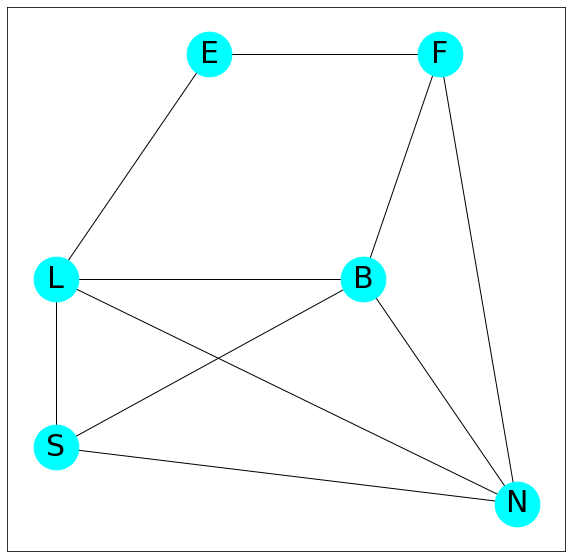

In [53]:
draw_colored_graph(graph, pos=pos)

#### 1) 그래프에서 연결 에지가 홀수인 홀수점 노드를 찾는 함수를  구현해봅시다.

In [54]:
def find_odd_points(graph):
    odds=[]
    for i in graph:
        if len(graph[i])%2 != 0:
            odds.append(i)
    return odds    

In [55]:
find_odd_points(graph)

['S', 'F']

#### 2) 시작점(노드) 및 종단점(노드)을 임의로 정하고 시작노드에서 종단노드까지의 경로, 즉 시작-종단 경로(백본 경로)를 1개만 찾아봅시다. 

In [56]:
odds = find_odd_points(graph)
print("odds[0]=", odds[0])
print("odds[1]=", odds[1])
backbone_path = find_path_by_bfs(graph, odds[0], odds[1])
print(backbone_path)

odds[0]= S
odds[1]= F
['S', 'B', 'F']


#### 3) 그래프에서 위에서 찾은 경로를 제거한 그래프를 만들어 봅시다. 

#### 다음 [그림 5] 는  [그림 4] 그래프에서 백본 경로 ['S', 'B', 'F'] 가 제거된 그래프입니다.
![alt text](./graph_no_backbone.png)

In [57]:
def remove_path_from_graph(graph, path):
    if len(path) < 2:
        return graph
    for i in range(len(path)-1):       
        if path[i+1] in graph[path[i]]:
                graph[path[i]].remove(path[i+1])
        if path[i] in graph[path[i+1]]:
                graph[path[i+1]].remove(path[i])
    return graph 

In [58]:
graph1=remove_path_from_graph(graph, backbone_path)
graph1

{'S': ['L', 'N'],
 'B': ['L', 'N'],
 'L': ['B', 'E', 'N', 'S'],
 'N': ['B', 'F', 'L', 'S'],
 'E': ['F', 'L'],
 'F': ['E', 'N']}

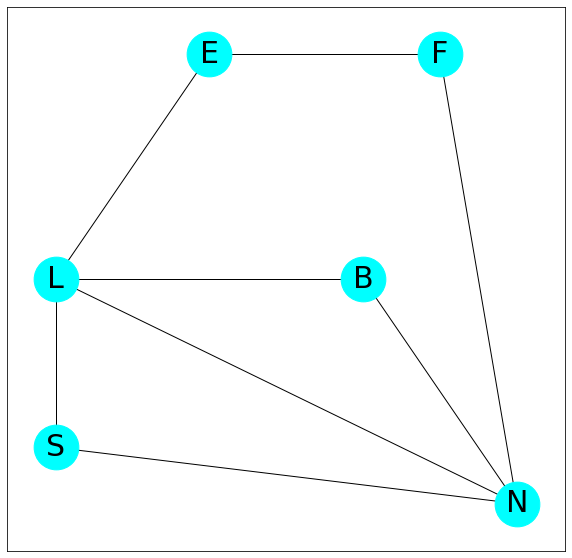

In [59]:
draw_colored_graph(graph1, pos=pos)

#### 4) 백본 경로 상의 노드에 대해 단순 회로(simple circuit)가 있으면 1개만  찾아 봅시다.
(화로란 출발 노드와 종단 노드가 동일한 경로를 말하며, 단순 회로는 내부에 회로가 없는 호로이다.)

In [60]:
circuit_s=find_circuit_by_dfs(graph1, 'S', 'S')
circuit_s   

['S', 'L', 'B', 'N', 'S']

##### 예를 들어 회로 ['S', 'L', 'B', 'N', 'S'] 는  다음   [그림 6]의 빨간색 회로 부분이다.
![Altext](circuit_graph_no_backbone.png)


#### 5-3') 남은 그래프에서 상기 찾은 순환 경로(circuit)를 그래프에서 제거하여 봅시다.
(이전에 만든 함수를 이용합니다.)

상기 [그림 6]에서 빨간색 부분을 제거하면 다음과 [그림 7]의 그래프이며, 이 그래프의 표현은 
{S': [], 'B': [], 'L': ['E', 'N'], 'N': ['F', 'L'], 'E': ['F', 'L'], 'F': ['E', 'N']}
![Altext](./graph_circuit_removed.png) 이고, 이 그래프 표현은 다음과 같이 구한다,  

In [61]:
graph2=remove_path_from_graph(graph1, circuit_s)
print(graph2)

{'S': [], 'B': [], 'L': ['E', 'N'], 'N': ['F', 'L'], 'E': ['F', 'L'], 'F': ['E', 'N']}


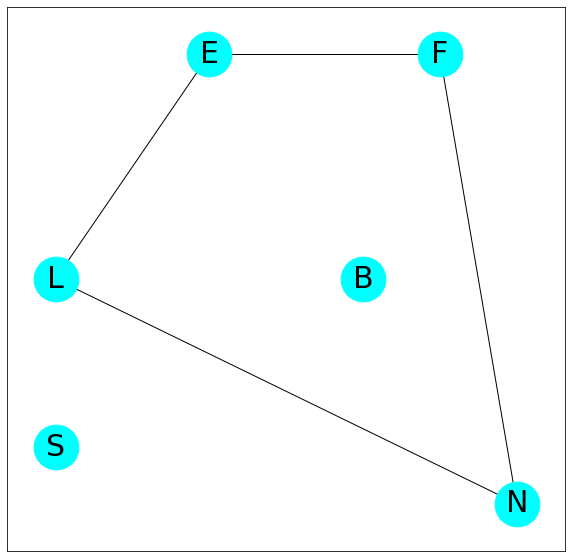

In [62]:
draw_colored_graph(graph2, pos=pos)

#### 5-4') 남은 그래프에서 추가적인 순환 경로(circuit)가 있으면 계속 찾습니다.

In [63]:
circuit_f=find_circuit_by_dfs(graph1, 'F', 'F')
circuit_f

['F', 'E', 'L', 'N', 'F']

#### 5-3") 찾은 순환 경로(circuit)를 남은 그래프에서 제거합니다.
(이전에 만든 함수를 이용합니다.)

In [64]:
graph_f=remove_path_from_graph(graph2, circuit_f)
print(graph_f)

{'S': [], 'B': [], 'L': [], 'N': [], 'E': [], 'F': []}


#### 6) 이제, 이상 각 구현된 함수들을 이용하여 오일러 경로 찾기 함수를 구현한 결과는 다음과 같다.¶

In [65]:
import copy
def find_Euler_path(test_graph):
    graph = copy.deepcopy(test_graph)
    circuit=[]
    add_circuit=[]
    path=[]
    Euler_path=[]
    temp=True
    odds=find_odd_points(graph)
    print("odd nodes of the Graph: {}".format(odds)) 
    if len(odds)!= 2:        
        print("No Euler path Exists")
        return
        
    Euler_path=find_path_by_bfs(graph, odds[0], odds[1])
    print("Backbone Path of the Graph: {}".format(Euler_path)) 
    
    graph=remove_path_from_graph(graph, Euler_path)
    
    path = Euler_path.copy()
    
    for i in range(len(path)): #백본 경로의 각 노드에 대해, 순차적으로 각 노드에서 출발하여 해당 노드로 다시 돌아오는 회로를 찾아 추가
        while temp==True:
            add_circuit=find_circuit_by_dfs(graph, path[i], path[i]) 

            if add_circuit: # 추가 회로(순환경로)가 발견되면
                if len(circuit)>1 and circuit[-1]==add_circuit[0]:
                    circuit=circuit[0:-1]+add_circuit #circuit 마지막 원소와 add_circuit 첫원소가 겹치니까, circuit 마지막 전 원소까지와 add_circuit 를 합쳐야함  
                    
                else:    
                    circuit=circuit+add_circuit
                graph=remove_path_from_graph(graph, add_circuit)
                temp=True
            else:
                temp=False
        if circuit: # 백본 경로의 해당 노드에서의  추가 회로(순환경로)가 더 이상 없으면, 현재까지 찾아낸 해당 노드에서의 회로들의 총합을 오리러 경로 해당 위치에 삽입 
            Euler_path[i]=circuit 
        circuit=[] 
        temp=True
    return Euler_path    

In [66]:
fig4_graph = {'S': ['B', 'L', 'N'],
       'B': ['F', 'L', 'N' , 'S'],
       'L': ['B', 'E',  'N', 'S'],
       'N': ['B', 'F', 'L', 'S'],
       'E': ['F', 'L'],
       'F': ['B', 'E', 'N'] }

In [67]:
#draw_colored_graph(fig4_graph, pos=pos)
Euler_path=find_Euler_path(fig4_graph)
print("Euler Path in the Graph: {}".format(Euler_path))

odd nodes of the Graph: ['S', 'F']
Backbone Path of the Graph: ['S', 'B', 'F']
Euler Path in the Graph: [['S', 'L', 'B', 'N', 'S'], 'B', ['F', 'E', 'L', 'N', 'F']]


#### 상기 결과 출력값은 홀수점 'S'에서 시작하여  'B', 'F' 순으로 백본 경로를 진행할 때, 각 백본 경로의 시작 노드 'S' 에서의 순환 경로 ['S', 'L', 'B', 'N', 'S'], 백본 경로의 중간노드, 'B', 백본 경로의 종단노드 'F'에서의 순환 경로 ['F', 'E', 'L', 'N', 'F'] 로 구성된 오일러 경로를 나타낸다. 
![Altext](./resulting_Euler_path_.png)

<br/><br/><br/><br/>
<h1 style='text-align:center;'>실습 문제

### 실습 1. 
#### 너비우선 탐색 방법을 활용하여 주어진 그래프에서 주어진 시작 노드와 종단 노드간의  모든 경로와 그 경로의 길이를 구하는 파이썬 함수를 코딩하여 보고, 이를 [그림 9]에 적용하여 보시오. 
![Altext](fig12-4.png)
#### 주어진 그래프 표현은 인접목록 표현으로 주어진다고 가정함. 즉, [그림 9]의 그래프 의 인접목록  표현은 다음과 같다. 
~~~python
graph_w = {'S': [['B', 175], ['L', 125],['N', 320]],
             'B': [['F', 245], ['L', 115], ['N', 145], ['S', 175]],
             'L': [['B', 115], ['E', 645],['F', 220],['N', 260],['S', 125]],
             'N': [['B', 145], ['F', 385],['L', 260],['S', 320]],
             'E': [['F', 450],['L', 645]],
             'F': [['B', 245], ['E', 450],['N', 385]]} 
~~~

### 실습 2. 
#### 너비우선 탐색 방법을 활용하여 주어진 그래프에서 주어진 시작 노드와 종단 노드간의최단 경로를 찾는 파이썬 함수를 코딩하여 보고, 이를 상기 [그림 9]에 적용하여 보시오. 

### 실습 3.
#### 깊이 우선 탐색 방법을 활용하여 주어진 그래프에서 주어진 시작 노드와 종단 노드간의최단 경로를 찾는 파이썬 함수를 코딩하여 보고, 이를 상기  [그림 9]에 적용하여 보시오. 